# 📘 Fine-tuning DeepSeek-OCR on UIT_HWDB

## 1. Installation

In [ ]:
# 1. Cài đặt Unsloth & Dependencies
!pip install -q --no-deps bitsandbytes accelerate xformers peft trl triton cut_cross_entropy unsloth_zoo
!pip install -q sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" "hf_transfer"
!pip install -q --no-deps unsloth

# 2. Cài đặt Transformers & TRL đúng version yêu cầu
!pip install -q transformers==4.56.2
!pip install -q --no-deps trl==0.22.2

# 3. Thư viện hỗ trợ
!pip install -q jiwer einops addict easydict torchvision

In [2]:
import os
# để in log gọn hơn
os.environ["UNSLOTH_WARN_UNINITIALIZED"] = '0'

## 2. Load model & LoRA

In [3]:
import torch
from unsloth import FastVisionModel
from transformers import AutoModel
from huggingface_hub import snapshot_download

# Tải weights nếu chưa có
if not os.path.exists("./deepseek_ocr"):
    snapshot_download("unsloth/DeepSeek-OCR", local_dir = "deepseek_ocr")

# Load Model 4-bit
model, tokenizer = FastVisionModel.from_pretrained(
    "./deepseek_ocr",
    load_in_4bit = True,
    auto_model = AutoModel,
    trust_remote_code = True,
    unsloth_force_compile = True,
    use_gradient_checkpointing = "unsloth",
)

# Gắn LoRA Adapter cho Training
model = FastVisionModel.get_peft_model(
    model,
    target_modules=[
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
    ],
    r = 16,           # Rank 16 là tiêu chuẩn tốt
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)

# Chuyển sang chế độ Training
FastVisionModel.for_training(model)
print("✅ Model đã sẵn sàng cho Fine-tuning!")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


2025-12-10 10:56:58.721660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765364218.923640      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765364218.979598      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🦥 Unsloth Zoo will now patch everything to make training faster!
Unsloth: Could not import trl.trainer.alignprop_trainer: Failed to import trl.trainer.alignprop_trainer because of the following error (look up to see its traceback):
Failed to import trl.models.modeling_sd_base because of the following error (look up to see its traceback):
Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion because of the following error (look up to see its traceback):
Failed to import diffusers.loaders.ip_adapter because of the following error (look up to see its traceback):
Current Torch with Flash-Attention 2.5.7 doesnt have a compatible aten::_flash_attention_forward schema
EXPECTED:
aten::_flash_attention_forward(Tensor query, Tensor key, Tensor value, Tensor? cum_seq_q, Tensor? cum_seq_k, SymInt max_q, SymInt max_k, float dropout_p, bool is_causal, bool return_debug_mask, *, float? scale=None, SymInt? window_size_left=None, SymInt? window_size_right=None, Tensor? seqused

.gitattributes: 0.00B [00:00, ?B/s]

README-checkpoint.md: 0.00B [00:00, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

assets/fig1.png:   0%|          | 0.00/396k [00:00<?, ?B/s]

assets/show1.jpg:   0%|          | 0.00/117k [00:00<?, ?B/s]

assets/show2.jpg:   0%|          | 0.00/216k [00:00<?, ?B/s]

assets/show3.jpg:   0%|          | 0.00/247k [00:00<?, ?B/s]

assets/show4.jpg:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

conversation.py: 0.00B [00:00, ?B/s]

deepencoder.py: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

processor_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2025.12.1: Fast Deepseekocr patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 2. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at ./deepseek_ocr and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Unsloth: Making `model.base_model.model.model` require gradients
✅ Model đã sẵn sàng cho Fine-tuning!


## 3. Data processing

Use UIT_HWDB_paragraph dataset to fine-tune

In [4]:
INPUT_TRAIN_FILE = "/kaggle/input/uit-hwdb/train_line.jsonl"

Split Training and Validation set

In [5]:
import random
import os

# Cấu hình
SPLITTED_TRAIN_FILE = "/kaggle/working/train.jsonl"
SPLITTED_VAL_FILE = "/kaggle/working/val.jsonl"
SPLIT_RATIO = 0.1  # 10% của Train cho Validation

def split_train_val(input_path, train_out, val_out, ratio):
    if not os.path.exists(input_path):
        print(f"❌ Không tìm thấy file: {input_path}")
        return

    print(f"🔄 Đang đọc và chia tách dữ liệu từ {input_path}...")
    
    with open(input_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    # Xáo trộn ngẫu nhiên để chia cho đều
    random.seed(42) # Cố định seed để kết quả tái lập được
    random.shuffle(lines)
    
    # Tính số lượng mẫu
    total = len(lines)
    val_size = int(total * ratio)
    
    val_data = lines[:val_size]
    train_data = lines[val_size:]
    
    # Ghi ra file
    with open(val_out, 'w', encoding='utf-8') as f:
        f.writelines(val_data)
        
    with open(train_out, 'w', encoding='utf-8') as f:
        f.writelines(train_data)
        
    print(f"✅ Hoàn tất!")
    print(f"   - Train set (Final): {len(train_data)} mẫu -> Lưu tại: {train_out}")
    print(f"   - Validation set:    {len(val_data)} mẫu -> Lưu tại: {val_out}")

# Thực thi
split_train_val(INPUT_TRAIN_FILE, SPLITTED_TRAIN_FILE, SPLITTED_VAL_FILE, SPLIT_RATIO)

🔄 Đang đọc và chia tách dữ liệu từ /kaggle/input/uit-hwdb/train_line.jsonl...
✅ Hoàn tất!
   - Train set (Final): 6326 mẫu -> Lưu tại: /kaggle/working/train.jsonl
   - Validation set:    702 mẫu -> Lưu tại: /kaggle/working/val.jsonl


Data collator & Preprocessed Dataset

In [6]:
import json
import math
import io
import os
from dataclasses import dataclass
from typing import Dict, List, Any, Tuple
from PIL import Image, ImageOps
import unicodedata 
import torch
from torch.nn.utils.rnn import pad_sequence
from deepseek_ocr.modeling_deepseekocr import text_encode, BasicImageTransform, dynamic_preprocess

# 1. Định nghĩa DataCollator 
@dataclass
class DeepSeekOCRDataCollator:
    tokenizer: Any
    model: Any
    image_size: int = 512 
    base_size: int = 1024
    crop_mode: bool = True
    image_token_id: int = 128815
    train_on_responses_only: bool = True

    def __init__(self, tokenizer, model, image_size=640, base_size=1024, crop_mode=True, train_on_responses_only=True):
        self.tokenizer = tokenizer
        self.model = model
        self.image_size = image_size
        self.base_size = base_size
        self.crop_mode = crop_mode
        self.train_on_responses_only = train_on_responses_only
        self.image_token_id = 128815
        self.dtype = model.dtype
        self.bos_id = tokenizer.bos_token_id if tokenizer.bos_token_id is not None else 0
        self.image_transform = BasicImageTransform(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5), normalize=True)

    def process_image(self, image: Image.Image):
        images_list, images_crop_list, images_spatial_crop = [], [], []
        
        if self.crop_mode:
            if image.size[0] <= 640 and image.size[1] <= 640:
                crop_ratio = (1, 1); images_crop_raw = []
            else:
                images_crop_raw, crop_ratio = dynamic_preprocess(image, min_num=2, max_num=9, image_size=self.image_size, use_thumbnail=False)
            
            global_view = ImageOps.pad(image, (self.base_size, self.base_size), color=tuple(int(x*255) for x in self.image_transform.mean))
            images_list.append(self.image_transform(global_view).to(self.dtype))
            images_spatial_crop.append(list(crop_ratio))
            
            if crop_ratio[0] > 1 or crop_ratio[1] > 1:
                for crop in images_crop_raw: images_crop_list.append(self.image_transform(crop).to(self.dtype))
                
            num_queries = math.ceil((self.image_size // 16) / 4)
            num_queries_base = math.ceil((self.base_size // 16) / 4)
            tokenized_image = ([self.image_token_id] * num_queries_base + [self.image_token_id]) * num_queries_base + [self.image_token_id]
            if crop_ratio[0] > 1 or crop_ratio[1] > 1:
                tokenized_image += ([self.image_token_id] * (num_queries * crop_ratio[0]) + [self.image_token_id]) * (num_queries * crop_ratio[1])
        return images_list, images_crop_list, images_spatial_crop, tokenized_image, crop_ratio

    def __call__(self, features):
        batch_data = []
        for feature in features:
            messages = feature['messages']
            try:
                images = [msg['images'][0] for msg in messages if 'images' in msg]
                if not images: continue
                
                tokenized_str, images_seq_mask = [self.bos_id], [False]
                images_list, images_crop_list, images_spatial_crop = [], [], []
                prompt_token_count, image_idx = -1, 0
                
                for message in messages:
                    if message['role'] == "<|Assistant|>":
                        prompt_token_count = len(tokenized_str)
                        content = message['content'].strip() + self.tokenizer.eos_token
                    else:
                        content = message['content']
                        
                    splits = content.split('<image>')
                    for i, text_part in enumerate(splits):
                        toks = text_encode(self.tokenizer, text_part, bos=False, eos=False)
                        tokenized_str.extend(toks); images_seq_mask.extend([False]*len(toks))
                        
                        if i < len(splits)-1 and image_idx < len(images):
                            img_list, crop_list, sp_crop, tok_img, _ = self.process_image(images[image_idx])
                            images_list.extend(img_list); images_crop_list.extend(crop_list); images_spatial_crop.extend(sp_crop)
                            tokenized_str.extend(tok_img); images_seq_mask.extend([True]*len(tok_img))
                            image_idx += 1
                
                images_ori = torch.stack(images_list, dim=0)
                images_crop = torch.stack(images_crop_list, dim=0) if images_crop_list else torch.zeros((1, 3, self.base_size, self.base_size), dtype=self.dtype)
                
                # Lưu dữ liệu thô vào batch
                batch_data.append({
                    "input_ids": torch.tensor(tokenized_str, dtype=torch.long),
                    "images_seq_mask": torch.tensor(images_seq_mask, dtype=torch.bool),
                    "images_ori": images_ori, 
                    "images_crop": images_crop,
                    "images_spatial_crop": torch.tensor(images_spatial_crop, dtype=torch.long),
                    "prompt_token_count": prompt_token_count
                })
            except Exception as e: print(f"Error processing sample: {e}"); continue
        
        # 1. Pad input_ids (Token)
        input_ids = pad_sequence([x['input_ids'] for x in batch_data], batch_first=True, padding_value=self.tokenizer.pad_token_id)
        
        # 2. Pad images_seq_mask (Mask ảnh) -> Bắt buộc phải pad để cùng chiều dài với input_ids
        images_seq_mask_padded = pad_sequence([x['images_seq_mask'] for x in batch_data], batch_first=True, padding_value=False)

        # 3. Tạo Labels
        labels = input_ids.clone()
        labels[labels == self.tokenizer.pad_token_id] = -100 # Mask phần padding của hệ thống
        
        # 4. Mask toàn bộ token ảnh (sử dụng mask đã padding) 
        labels[images_seq_mask_padded] = -100 

        # 5. Mask câu hỏi của User (Prompt masking)
        if self.train_on_responses_only:
            for i, item in enumerate(batch_data):
                if item['prompt_token_count'] > 0:
                    # Slicing an toàn: chỉ mask đoạn đầu, phần sau giữ nguyên
                    labels[i, :item['prompt_token_count']] = -100 
        
        return {
            "input_ids": input_ids, 
            "labels": labels, 
            "attention_mask": (input_ids != self.tokenizer.pad_token_id).long(),
            "images": [(x['images_crop'], x['images_ori']) for x in batch_data],
            "images_seq_mask": images_seq_mask_padded,
            "images_spatial_crop": torch.cat([x['images_spatial_crop'] for x in batch_data], dim=0)
        }

# 2. Hàm đọc JSONL và convert sang format Dataset, chuẩn hóa NFC
def load_custom_dataset(jsonl_path):
    print(f"📂 Đang load dữ liệu từ {jsonl_path}...")
    dataset = []
    instruction = "<image>\nFree OCR. " 
    
    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                item = json.loads(line)
                img_path = item['image']
                if not os.path.exists(img_path): continue
                
                image = Image.open(img_path).convert("RGB")
                
                ground_truth = item['text']
                if ground_truth:
                    # Chuẩn hóa về NFC (Dựng sẵn) để thống nhất bảng mã
                    ground_truth = unicodedata.normalize('NFC', ground_truth)

                dataset.append({
                    "messages": [
                        {"role": "<|User|>", "content": instruction, "images": [image]},
                        {"role": "<|Assistant|>", "content": ground_truth}
                    ]
                })
            except Exception: continue
    print(f"✅ Đã load thành công {len(dataset)} mẫu (Đã chuẩn hóa NFC).")
    return dataset

## 4. Training params

In [ ]:
from transformers import Trainer, TrainingArguments
from unsloth import is_bf16_supported


# 0. Chia tập Train & Val
train_dataset = load_custom_dataset(SPLITTED_TRAIN_FILE)
eval_dataset  = load_custom_dataset(SPLITTED_VAL_FILE) 

# 1. Khởi tạo Data Collator
data_collator = DeepSeekOCRDataCollator(
    tokenizer=tokenizer,
    model=model,
    crop_mode=True
)

# 2. Cấu hình tham số Training 
training_args = TrainingArguments(
    output_dir = "/kaggle/working/fine-tuning",
    
    # --- TRAINING PARAMS ---
    per_device_train_batch_size = 2,  # phù hợp với GPU T4
    gradient_accumulation_steps = 8,  # 2 * 8 = 16 (effective batch)
    per_device_eval_batch_size = 2,
    eval_accumulation_steps = 1,

    num_train_epochs = 3,             # train 3 epochs 

    learning_rate = 2e-4,             # Learning rate chuẩn cho QLoRA
    lr_scheduler_type = "cosine",     # Cosine giúp hội tụ tốt hơn Linear ở cuối giai đoạn
    warmup_ratio = 0.1,               # 10% thời gian đầu để warm-up
    weight_decay = 0.01, 

    # --- TỐI ƯU HÓA PHẦN CỨNG ---
    fp16 = not is_bf16_supported(),   # Bắt buộc True trên T4
    bf16 = is_bf16_supported(),       # False trên T4
    optim = "adamw_8bit",             # Dùng 8-bit optimizer để tiết kiệm VRAM
    gradient_checkpointing = True,
    
    # --- TỐI ƯU HÓA TỐC ĐỘ ---
    group_by_length = False,          # False mới train được trên Kaggle GPU T4
    dataloader_num_workers = 2,       # Load dữ liệu đa luồng
    
    # --- EVALUATION & SAVE ---
    save_strategy = "steps",          # Lưu model sau mỗi 100 steps
    save_steps = 100,
    eval_strategy = "steps",          # đánh giá sau mỗi 100 steps
    eval_steps = 100,
    save_total_limit = 2,             # Chỉ giữ lại 2 checkpoint gần nhất cho nhẹ ổ cứng
    load_best_model_at_end = True,    # Load model tốt nhất khi dừng
    metric_for_best_model = "eval_loss", # Chọn Loss làm metric
    greater_is_better = False,        # Loss càng thấp càng tốt
    # other
    logging_steps = 10,               # In log mỗi 10 bước
    remove_unused_columns = False,    # Bắt buộc cho Vision Model
    report_to = "none",
    seed = 3407,
)

# 3. Khởi tạo Trainer
trainer = Trainer(
    model = model,
    processing_class = tokenizer,
    data_collator = data_collator,
    train_dataset = train_dataset,
    eval_dataset = eval_dataset,
    args = training_args,
)

print("✅ Đã chuẩn bị Dataset, Trainer thành công!")

📂 Đang load dữ liệu từ /kaggle/working/train.jsonl...
✅ Đã load thành công 6326 mẫu (Đã chuẩn hóa NFC).
📂 Đang load dữ liệu từ /kaggle/working/val.jsonl...
✅ Đã load thành công 702 mẫu (Đã chuẩn hóa NFC).
✅ Đã chuẩn bị Dataset, Trainer thành công!


/tmp/ipykernel_20/2331055196.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer._unsloth___init__`. Use `processing_class` instead.
  trainer = Trainer(


## 5. Fine-tuning

In [8]:
# Clean cache trước khi train để tối ưu RAM
import torch
import gc
import os

# chống phân mảnh bộ nhớ 
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
# clean
gc.collect()
torch.cuda.empty_cache()
print("🧹 Đã dọn dẹp và tối ưu bộ nhớ GPU")

🧹 Đã dọn dẹp và tối ưu bộ nhớ GPU


In [9]:
print("🚀 Bắt đầu Fine-tuning...")
print(f"   - Batch Size thực tế: {training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps}")
print(f"   - Epochs: {training_args.num_train_epochs}")
print(f"   - Scheduler: {training_args.lr_scheduler_type}")

trainer_stats = trainer.train()

print("🎉 Fine-tuning hoàn tất!")

🚀 Bắt đầu Fine-tuning...
   - Batch Size thực tế: 16
   - Epochs: 3
   - Scheduler: SchedulerType.COSINE


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 6,326 | Num Epochs = 3 | Total steps = 594
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 8
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 8 x 1) = 32
 "-____-"     Trainable parameters = 77,509,632 of 3,413,615,872 (2.27% trained)
Unsloth: Not an error, but DeepseekOCRForCausalLM does not accept `num_items_in_batch`.
Using gradient accumulation will be very slightly less accurate.
Read more on gradient accumulation issues here: https://unsloth.ai/blog/gradient


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Unsloth: Will smartly offload gradients to save VRAM!
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
BASE:  torch.Size([1, 2

Step,Training Loss,Validation Loss
100,0.582500,0.562814
200,0.409100,0.423277
300,0.249100,0.385756
400,0.216800,0.345006
500,0.115000,0.362110


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([3, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE: 

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([7, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE: 

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE: 

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE: 

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
BASE: 

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
BASE: 

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


🎉 Fine-tuning hoàn tất!


## 6. Traing History 

💾 Đã lưu biểu đồ vào 'training_loss_chart.png'


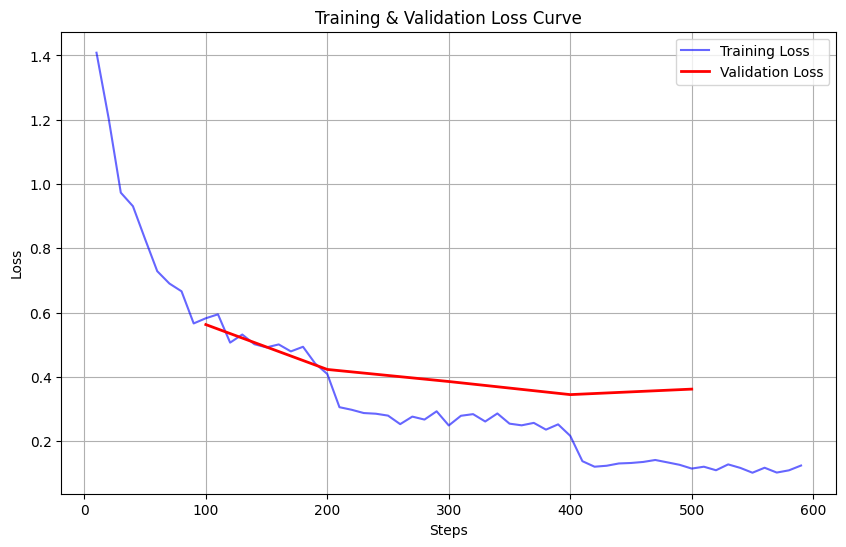

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_training_history(trainer_stats):
    # Lấy lịch sử log
    history = trainer.state.log_history
    
    # Tách dữ liệu Train Loss và Eval Loss
    train_steps = []
    train_loss = []
    eval_steps = []
    eval_loss = []
    
    for log in history:
        if 'loss' in log:
            train_steps.append(log['step'])
            train_loss.append(log['loss'])
        if 'eval_loss' in log:
            eval_steps.append(log['step'])
            eval_loss.append(log['eval_loss'])
            
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(train_steps, train_loss, label='Training Loss', color='blue', alpha=0.6)
    if eval_loss:
        plt.plot(eval_steps, eval_loss, label='Validation Loss', color='red', linewidth=2)
        
    plt.title('Training & Validation Loss Curve')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Lưu ảnh để đưa vào báo cáo
    plt.savefig("training_loss_chart.png")
    print("💾 Đã lưu biểu đồ vào 'training_loss_chart.png'")
    
    plt.show()

# Gọi hàm
plot_training_history(trainer_stats)

## 7. Save model

In [11]:
out_dir = "/kaggle/working/fine_tuned_deepseek_ocr"

print("💾 Đang lưu Adapter LoRA...")

model.save_pretrained(out_dir)
tokenizer.save_pretrained(out_dir)

print(f"✅ Đã lưu model vào: {out_dir}")

💾 Đang lưu Adapter LoRA...


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


✅ Đã lưu model vào: /kaggle/working/fine_tuned_deepseek_ocr


In [ ]:
# Nén ZIP để tải về máy dễ dàng
import shutil

print("📦 Đang nén file zip...")
shutil.make_archive("/kaggle/working/fine_tuned_deepseek_ocr_uit", 'zip', out_dir)
print("🎉 Đã nén xong! Tải file 'fine_tuned_deepseek_ocr_uit.zip' trong phần Output")

📦 Đang nén file zip...
🎉 Đã nén xong! Tải file 'fine_tuned_deepseek_ocr_uit_para.zip' trong phần Output
